Linear Regression: -0.18854894078911766
Ridge Regression: -0.17617010933659089
Lasso Regression: -0.1839053341906785
Decision Tree: -3.1687948240913424
Random Forest: -0.6007220041339162
Gradient Boosting: -0.9757809651454087
XGBoost: -1.0360387979285801
AdaBoost: -1.0603617511958698
SVR: -0.18639116227047897
Best model: Ridge Regression


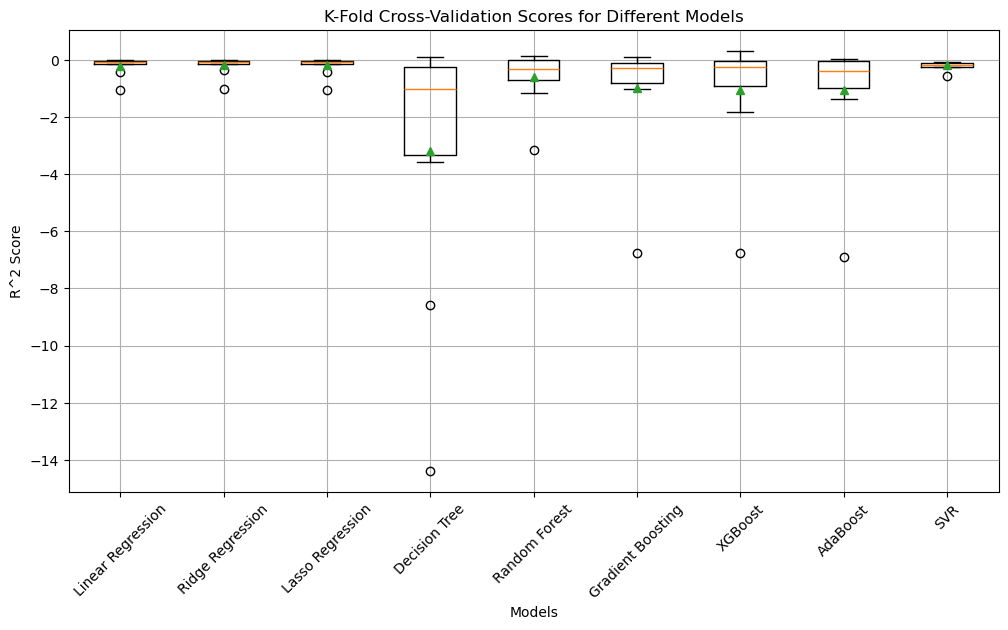

Linear Regression: -0.09976732699516902
Ridge Regression: -0.09044738235363341
Lasso Regression: -0.0966143676488909
Decision Tree: -1.5892033910526528
Random Forest: -0.39030681405533113
Gradient Boosting: -0.8753038204159029
XGBoost: -0.8774770898298435
AdaBoost: -0.6474703703378627
SVR: -0.12707837531700122
Best model: Ridge Regression


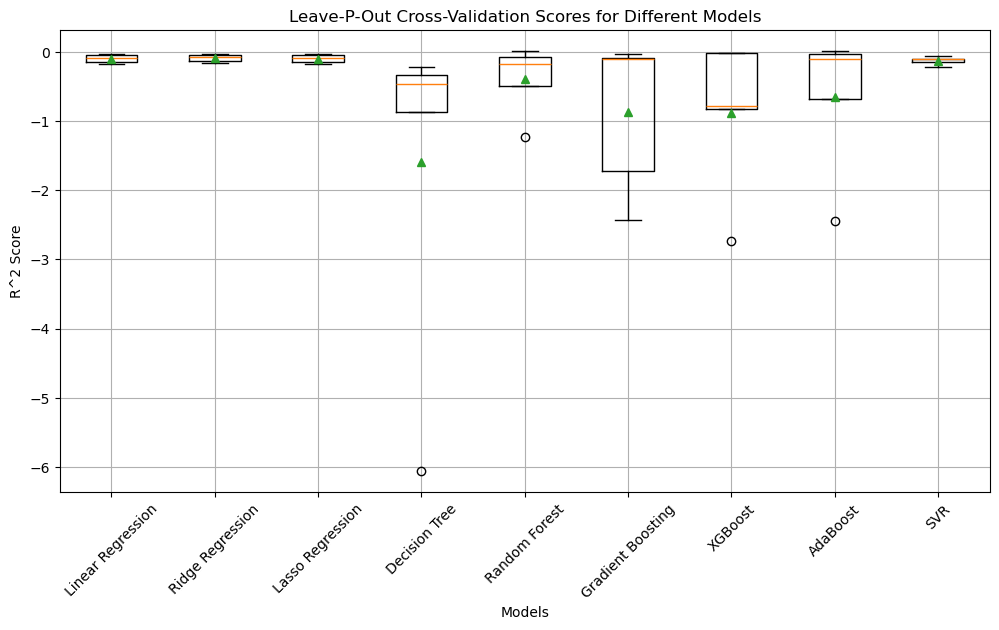

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset
dataset = pd.read_csv('dataset/dataset.csv', header = None)
dataset.columns = dataset.iloc[0]
dataset = dataset[1:]
dataset = dataset.drop(columns=['Year'])

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['District'] = label_encoder.fit_transform(dataset['District'])


# Handling missing data
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset.ffill(inplace=True)
# dataset.fillna(dataset.mean(), inplace=True)
# dataset.fillna(dataset.mode().iloc[0], inplace=True)
# dataset.fillna(dataset.median(), inplace=True)
dataset['Total Cases'] = dataset.iloc[:, 37:49].sum(axis=1)
dataset = dataset.drop(dataset.columns[37:49], axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 0:-1].values
Y = dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)


# List of models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVR": SVR(),
}

# Perform cross-validation and evaluate each model

# K-Fold Cross Validation
results = []
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='r2')
    results.append(scores)
    print(f"{model_name}: {scores.mean()}")

# Find the best model based on the mean cross-validation score
best_model_index = np.argmax([np.mean(scores) for scores in results])
best_model_name = list(models.keys())[best_model_index]
print(f"Best model: {best_model_name}")

# Plotting the cross-validation results
plt.figure(figsize=(12, 6))
plt.boxplot(results, labels=models.keys(), showmeans=True)
plt.title('K-Fold Cross-Validation Scores for Different Models')
plt.ylabel('R^2 Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Leave-One-Out Cross Validation
# Ensure there are no missing values
# assert not np.any(np.isnan(X_train)), "X_train contains NaN values"
# assert not np.any(np.isnan(Y_train)), "Y_train contains NaN values"

# results = []
# for model_name, model in models.items():
#     try:
#         scores = cross_val_score(model, X_train, Y_train, cv=len(X_train), scoring='r2')
#         results.append(scores)
#         print(f"{model_name}: {scores.mean()}")
#     except Exception as e:
#         print(f"Error with model {model_name}: {e}")
#         results.append(np.array([np.nan]))

# # Find the best model based on the mean cross-validation score
# best_model_index = np.argmax([np.nanmean(scores) for scores in results])
# best_model_name = list(models.keys())[best_model_index]
# print(f"Best model: {best_model_name}")

# Leave-P-Out Cross Validation
results = []
for model_name, model in models.items():
    try:
        scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
        results.append(scores)
        print(f"{model_name}: {scores.mean()}")
    except Exception as e:
        print(f"Error with model {model_name}: {e}")
        results.append(np.array([np.nan]))

# Find the best model based on the mean cross-validation score
best_model_index = np.argmax([np.nanmean(scores) for scores in results])
best_model_name = list(models.keys())[best_model_index]
print(f"Best model: {best_model_name}")

# Plotting the cross-validation results
plt.figure(figsize=(12, 6))
plt.boxplot(results, labels=models.keys(), showmeans=True)
plt.title('Leave-P-Out Cross-Validation Scores for Different Models')
plt.ylabel('R^2 Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



